In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.f' % x,'display.max_columns', None)

%matplotlib inline

# Exploring the price paid dataset

In [4]:
df["price"].describe()

count     1972513
mean       388020
std       1463015
min             1
25%        140000
50%        240000
75%        400000
max     594300000
Name: price, dtype: float64

In [6]:
df[df["price"]==1].head()

,Unnamed: 0,transactionUniqueIdentifier,price,dateOfTransfer,postcode,propertyType,oldNew,duration,PAON,SAON,street,locality,townCity,District,County,PPDCategoryType,recordStatus,join_test,Unnamed: 0.1,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LOCAL_AUTHORITY,CONSTITUENCY,COUNTY,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,CERTIFICATE_HASH,year,inflated_price
8337,8337,{2A289E9D-E7BD-CDC8-E050-A8C063054829},1,1995-02-10 00:00,SW11 1HT,T,N,F,16A,NaN,CHIVALRY ROAD,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A,"16A, Chivalry Road, SW11 1HT",nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,1995,1
10395,10395,{2A289E9D-3FF0-CDC8-E050-A8C063054829},1,1995-06-12 00:00,SW11 2RD,T,N,F,161B,NaN,HARBUT ROAD,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A,"161B, Harbut Road, SW11 2RD",nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,1995,1
13157,13157,{2A289E9E-BB20-CDC8-E050-A8C063054829},1,1995-11-30 00:00,NW4 1SJ,F,N,L,63A,NaN,SUNNY GARDENS ROAD,NaN,LONDON,BARNET,GREATER LONDON,A,A,"63A, Sunny Gardens Road, NW4 1SJ",nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,1995,1
13496,13496,{2A289E9E-A09D-CDC8-E050-A8C063054829},1,1995-05-24 00:00,SE13 7TS,F,Y,L,21C,NaN,SANDROCK ROAD,NaN,LONDON,LEWISHAM,GREATER LONDON,A,A,"21C, Sandrock Road, SE13 7TS",nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,1995,1
13497,13497,{2A289E9E-A09E-CDC8-E050-A8C063054829},1,1995-05-24 00:00,SE13 7TS,

In [7]:
df[df["price"]==594300000].head()

,Unnamed: 0,transactionUniqueIdentifier,price,dateOfTransfer,postcode,propertyType,oldNew,duration,PAON,SAON,street,locality,townCity,District,County,PPDCategoryType,recordStatus,join_test,Unnamed: 0.1,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LOCAL_AUTHORITY,CONSTITUENCY,COUNTY,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,CERTIFICATE_HASH,year,inflated_price
1922535,1922535,{582D0637-EE28-8F22-E053-6C04A8C01BAC},594300000,2017-07-31 00:00,W1U 8EW,O,N,L,55,UNIT 53,BAKER STREET,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A,"55, Baker Street, W1U 8EW",nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,2017,594300000


#### Max price: £594,300,000
#### Min price: £1
#### The price paid dataset contains sales which had an error in the price e.g. £1 for "16A, Chivalry Road, SW11 1HT"
#### The price paid dataset also contains sales for commercial property e.g. 594 million for "55, Baker Street, W1U 8EW" which is an office building.

In [11]:
#skewness and kurtosis
print("Skewness: %f" % df['inflated_price'].skew())
print("Kurtosis: %f" % df['inflated_price'].kurt())

Skewness: 101.802615
Kurtosis: 21871.631342


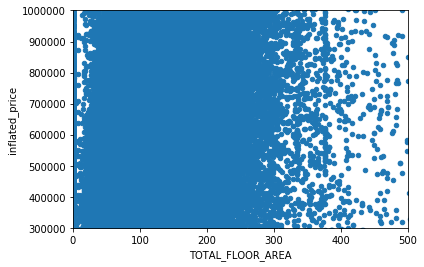

In [13]:
#scatter plot floorarea/saleprice
var = 'TOTAL_FLOOR_AREA'
data = pd.concat([df['inflated_price'], df[var]], axis=1)
data.plot.scatter(x=var, y='inflated_price', ylim=(300000,1000000), xlim=(0,500));

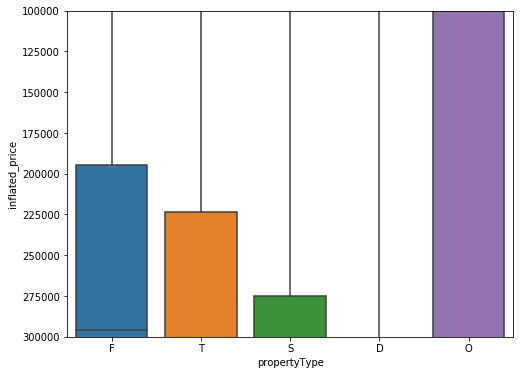

In [15]:
#box plot property type/saleprice
var = 'propertyType'
data = pd.concat([df['inflated_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="inflated_price", data=data)
fig.axis(ymin=300000, ymax=100000);

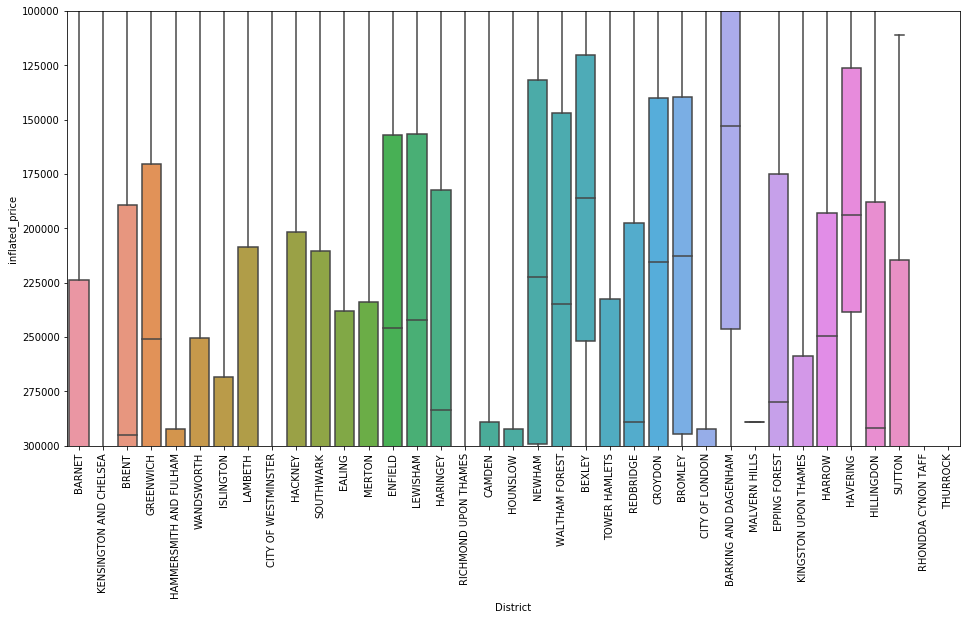

In [16]:
#box plot district/saleprice
var = 'District'
data = pd.concat([df['inflated_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="inflated_price", data=data)
fig.axis(ymin=300000, ymax=100000);
plt.xticks(rotation=90);

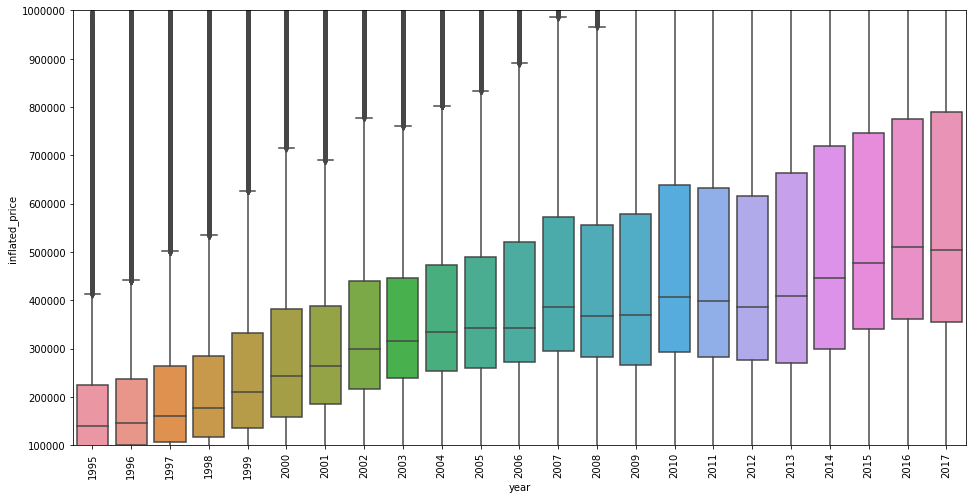

In [17]:
#box plot year/saleprice
var = 'year'
data = pd.concat([df['inflated_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="inflated_price", data=data)
fig.axis(ymin=100000, ymax=1000000);
plt.xticks(rotation=90);

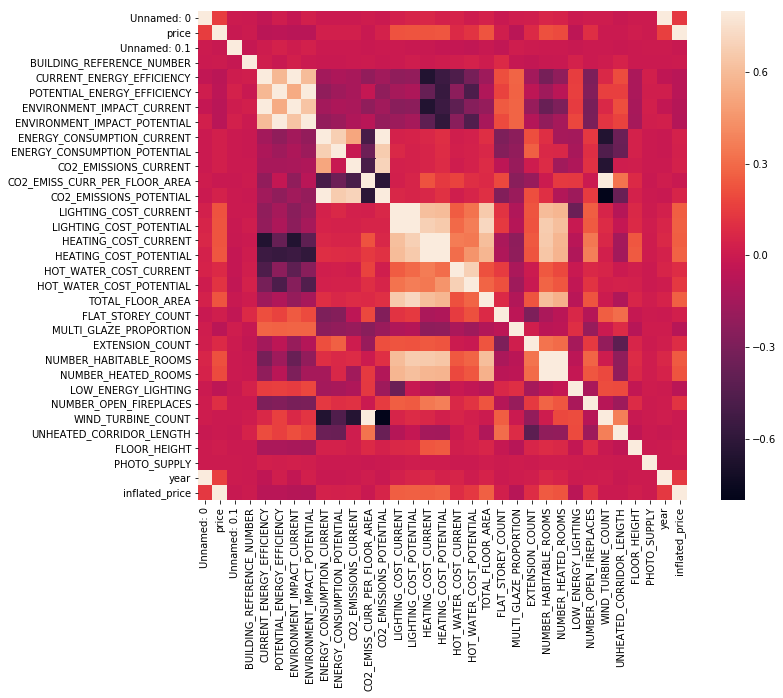

In [18]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [21]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ADDRESS3,1972444,1
FLOOR_ENV_EFF,1967310,1
ADDRESS2,1950982,1
SHEATING_ENERGY_EFF,1948833,1
SHEATING_ENV_EFF,1948833,1
FLOOR_ENERGY_EFF,1869947,1
UNHEATED_CORRIDOR_LENGTH,1835288,1
FLAT_STOREY_COUNT,1823507,1
FLAT_TOP_STOREY,1705771,1
SOLAR_WATER_HEATING_FLAG,1532772,1


In [5]:
#average price for each district
df.loc[df['townCity'] == 'LONDON'].groupby(['District'])['price'].mean()

District
BARKING AND DAGENHAM      143808
BARNET                    351789
BEXLEY                    147328
BRENT                     290910
BROMLEY                   186824
CAMDEN                    577319
CITY OF LONDON           1155253
CITY OF WESTMINSTER       791589
CROYDON                   184688
EALING                    352733
ENFIELD                   219282
EPPING FOREST             330503
GREENWICH                 241253
HACKNEY                   310580
HAMMERSMITH AND FULHAM    480604
HARINGEY                  291913
HARROW                    291457
HAVERING                  154201
HILLINGDON                273447
HOUNSLOW                  484070
ISLINGTON                 415033
KENSINGTON AND CHELSEA    905654
KINGSTON UPON THAMES      380805
LAMBETH                   307766
LEWISHAM                  222480
MALVERN HILLS             158000
MERTON                    377452
NEWHAM                    191299
REDBRIDGE                 265990
RHONDDA CYNON TAFF         45950
R

In [6]:
df['year'] = df['dateOfTransfer'].str[0:4]

In [7]:
df['year'].unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype=object)

In [8]:
#average price per year in england and wales
df.groupby(['year'])['price'].mean()

year
1995    67902
1996    71468
1997    78498
1998    85399
1999    95993
2000   107427
2001   118838
2002   137887
2003   155816
2004   178809
2005   189267
2006   203426
2007   219242
2008   216828
2009   213287
2010   235974
2011   232606
2012   238312
2013   256784
2014   279653
2015   296878
2016   311636
2017   338252
Name: price, dtype: float64

In [9]:
ldn_avg = df.loc[df['townCity'] == 'LONDON'].groupby(['year'])['price'].mean()

In [10]:
#average price per year in London
ldn_avg

year
1995   109015
1996   118591
1997   136443
1998   152924
1999   180468
2000   215678
2001   232896
2002   263585
2003   278266
2004   304482
2005   322694
2006   356073
2007   403919
2008   420074
2009   427725
2010   480095
2011   496103
2012   519401
2013   615728
2014   722955
2015   789413
2016   842597
2017   979543
Name: price, dtype: float64

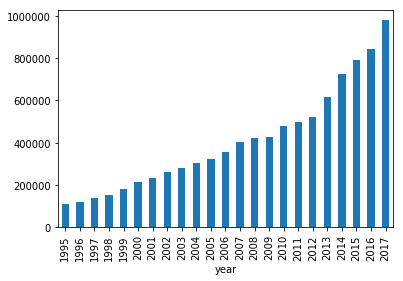

In [12]:
#bar chart of average price of London property each year since 1995
ldn_avg.plot.bar()

## Find correlations in price paid data

In [3]:
# Read in the data from datasourcing notebook - combined price paid and EPC
df = pd.read_csv(".../Joined_inflated.csv")

In [195]:
df.head()

,Unnamed: 0,transactionUniqueIdentifier,price,dateOfTransfer,postcode,propertyType,oldNew,duration,PAON,SAON,street,locality,townCity,District,County,PPDCategoryType,recordStatus,join_test,Unnamed: 0.1,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LOCAL_AUTHORITY,CONSTITUENCY,COUNTY,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,CERTIFICATE_HASH,year,inflated_price
0,0,{B9C980F2-296E-409D-87F3-4ABF6344FD2B},158000,1995-08-15 00:00,N3 3TX,F,N,L,8,NaN,SPENCER CLOSE,LONDON,LONDON,BARNET,GREATER LONDON,A,A,"8, Spencer Close, N3 3TX",67501,817399620120724070716,"8, Spencer Close",NaN,NaN,N3 3TX,4974930078,C,C,72,78,Flat,End-Terrace,2012-07-23,E09000003,E14000703,Greater London Authority,2012-07-24,marketed sale,73,79,155,119,3,29,2,111,56,296,315,205,122,89,Unknown,Y,2nd,N,nan,"Programmer, room thermostat and TRVs",100,double glazing installed before 2002,Normal,0,3,3,0,0,"From main system, no cylinder thermostat",Average,Average,(other premises below),NaN,NaN,Fully double glazed,Average,Average,"Cavity wall, as built, insulated (assumed)",Good,Good,None,NaN,NaN,(another dwelling above),NaN,NaN,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,No low energy lighting,Very Poor,Very Poor,mains gas (not community),0,unheated corridor,5,nan,0,NaN,natural,"8, Spencer Close",Barnet,Finchley and Golders Green,7c153aa3440ae9fa42527cfbe798095a9977c41f755a5e...,1995,289140
1,1,{3B6AA84B-EB07-427A-AAFF-4733F072FDB0},905000,1995-02-28 00:00,SW3 4NR,T,N,F,33,NaN,WELLINGTON SQUARE,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A,"33, Wellington Square, SW3 4NR",54310,430398120100202090222,"33, Wellington Square",NaN,NaN,SW3 4NR,6091212768,F,E,36,48,House,Mid-Terrace,2010-02-02,E09000020,E14000629,Greater London Authority,2010-02-02,marketed sale,31,41,434,339,15,73,12,209,111,2202,1785,245,182,211,Single,Y,NO DATA!,NaN,nan,Programmer and room thermostat,0,not defined,Normal,1,10,10,12,4,From main system,Good,Good,"Solid, no insulation (assumed)",NaN,NaN,Single glazed,Very Poor,Very Poor,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,"Room heaters, mains gas",NaN,NaN,"Pitched, 100 mm loft insulation",Average,Average,"Boiler and radiators, mains gas",Good,Good,Programmer and room thermostat,Average,Average,Low energy lighting in 12% of fixed outlets,Poor,Poor,mains gas - this is for backwards compatibilit...,0,NO DATA!,nan,2,0,N,natural,"33, Wellington Square",Kensington and Chelsea,Chelsea and Fulham,e2c071e37c35314e877192572b72ddc0c8253c7f32f5f7...,1995,1656150
2,2,{4

In [3]:
# Trim to only properties with an inflated price between £300,000 and £1,000,000
price_trim = df[(df['inflated_price'] <= 1000000) & (df['inflated_price'] >= 300000)]

In [48]:
# Trim to only one district in London
southwark = price_trim[price_trim["District"]=="SOUTHWARK"].copy()

In [49]:
# Remove null values where no EPC
southwarknonull = southwark[["inflated_price","TOTAL_FLOOR_AREA"]].dropna(axis=0,how='any').copy()

In [50]:
southwarknonull.shape

(17944, 2)

In [72]:
southwarknonull.head()

,inflated_price,TOTAL_FLOOR_AREA
25,494100,270
419,369660,136
2011,305610,148
5682,311100,159
10510,301950,293


In [51]:
# Calculate log inflated price
southwarknonulllog = southwarknonull.copy()

In [52]:
southwarknonulllog["log_inflated_price"] = np.log(southwarknonulllog['inflated_price'])

In [53]:
southwarknonulllog.drop("inflated_price",axis=1,inplace=True)

In [56]:
southwarknonulllog.shape

(17944, 2)

In [71]:
southwarknonulllog.head()

,TOTAL_FLOOR_AREA,log_inflated_price
25,270,13
419,136,13
2011,148,13
5682,159,13
10510,293,13


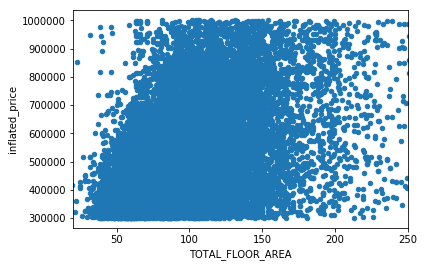

In [57]:
# Bivariate analysis on TOTAL_FLOOR_AREA and inflated_price
var = 'TOTAL_FLOOR_AREA'
data = pd.concat([southwarknonull['inflated_price'], southwarknonull[var]], axis=1)
data.plot.scatter(x=var, y='inflated_price', xlim=(20,250));

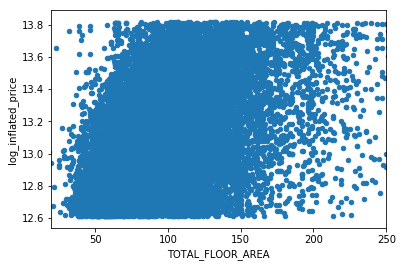

In [58]:
# Bivariate analysis on TOTAL_FLOOR_AREA and log_inflated_price
var = 'TOTAL_FLOOR_AREA'
data = pd.concat([southwarknonulllog['log_inflated_price'], southwarknonull[var]], axis=1)
data.plot.scatter(x=var, y='log_inflated_price', xlim=(20,250));

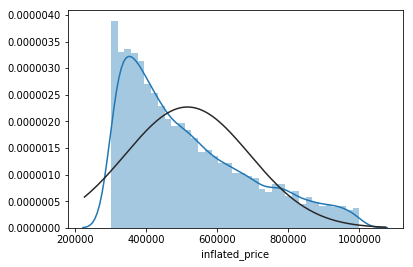

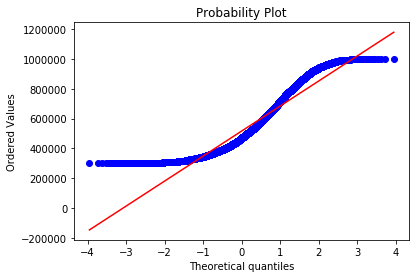

In [59]:
# Histogram and normal probability plot for inflated_price
sns.distplot(southwarknonull['inflated_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(southwarknonull['inflated_price'], plot=plt)

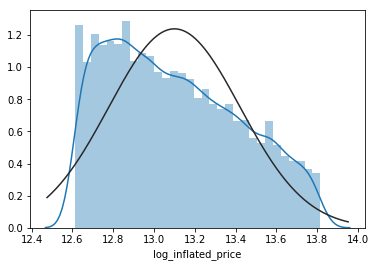

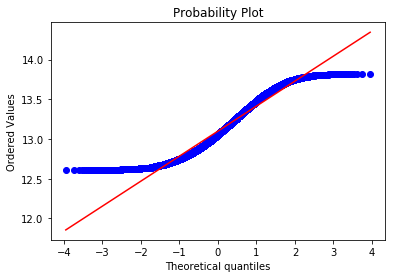

In [60]:
# Histogram and normal probability plot for log_inflated_price
sns.distplot(southwarknonulllog['log_inflated_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(southwarknonulllog['log_inflated_price'], plot=plt)

In [61]:
# Filter down to one year
twentysixteen = southwark[southwark["year"]==2016].copy()

In [62]:
twentysixteennonull = twentysixteen[["inflated_price","TOTAL_FLOOR_AREA"]].dropna(axis=0,how='any')

In [67]:
twentysixteennonull.head()

,inflated_price,TOTAL_FLOOR_AREA
1831744,848640,93
1831745,848640,93
1833242,895050,115
1834256,734400,94
1834258,499800,61


In [64]:
twentysixteennonulllog = twentysixteennonull.copy()

In [65]:
twentysixteennonulllog["log_inflated_price"] = np.log(twentysixteennonulllog['inflated_price'])

In [76]:
twentysixteennonulllog.drop("inflated_price",axis=1,inplace=True)

In [77]:
twentysixteennonulllog.head()

,TOTAL_FLOOR_AREA,log_inflated_price
1831744,93,14
1831745,93,14
1833242,115,14
1834256,94,14
1834258,61,13


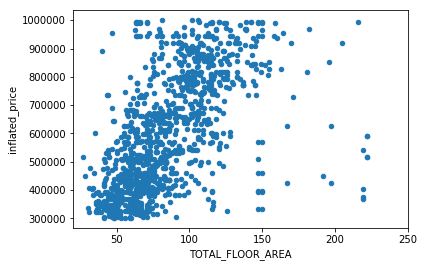

In [78]:
# Bivariate analysis on TOTAL_FLOOR_AREA and inflated_price
var = 'TOTAL_FLOOR_AREA'
data = pd.concat([twentysixteennonull['inflated_price'], twentysixteennonull[var]], axis=1)
data.plot.scatter(x=var, y='inflated_price', xlim=(20,250));

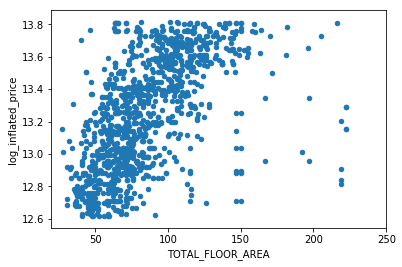

In [79]:
# Bivariate analysis on TOTAL_FLOOR_AREA and log_inflated_price
var = 'TOTAL_FLOOR_AREA'
data = pd.concat([twentysixteennonulllog['log_inflated_price'], twentysixteennonulllog[var]], axis=1)
data.plot.scatter(x=var, y='log_inflated_price', xlim=(20,250));

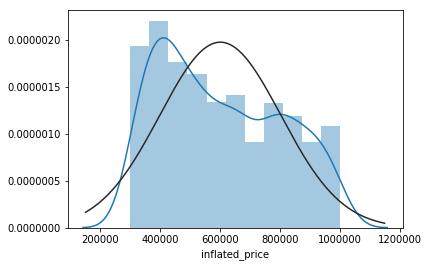

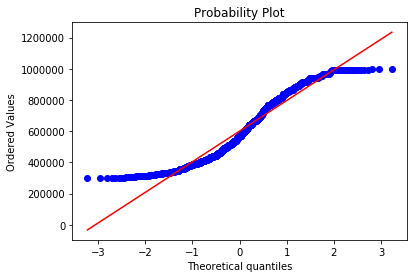

In [80]:
# Histogram and normal probability plot for inflated_price
sns.distplot(twentysixteennonull['inflated_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(twentysixteennonull['inflated_price'], plot=plt)

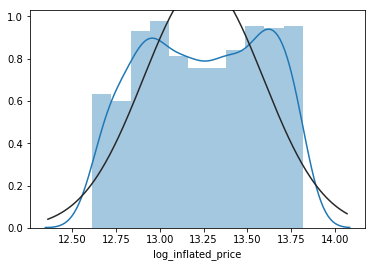

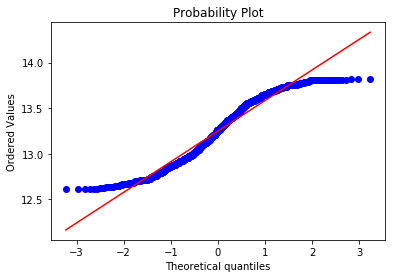

In [81]:
# Histogram and normal probability plot for log_inflated_price
sns.distplot(twentysixteennonulllog['log_inflated_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(twentysixteennonulllog['log_inflated_price'], plot=plt)

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % southwarknonull['log_inflated_price'].skew())
print("Kurtosis: %f" % southwarknonull['log_inflated_price'].kurt())

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(southwarknonull['log_inflated_price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [82]:
twentysixteennonull.head()

,inflated_price,TOTAL_FLOOR_AREA
1831744,848640,93
1831745,848640,93
1833242,895050,115
1834256,734400,94
1834258,499800,61


In [83]:
twentysixteennonull.shape

(1114, 2)

In [84]:
# Split into training and test data
y = twentysixteennonull["inflated_price"].reshape((1114,1))
X = twentysixteennonull['TOTAL_FLOOR_AREA'].reshape((1114,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [85]:
print X.shape
print y.shape

(1114, 1)
(1114, 1)


In [122]:
# Create linear regression model and apply to training data
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

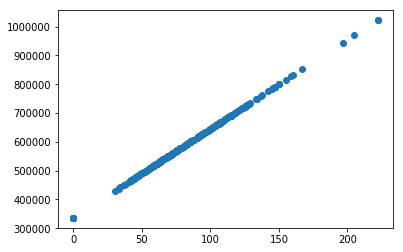

In [123]:
# Plot model prediction on test data
predictions = lm.predict(X_test)
plt.scatter(X_test,predictions)

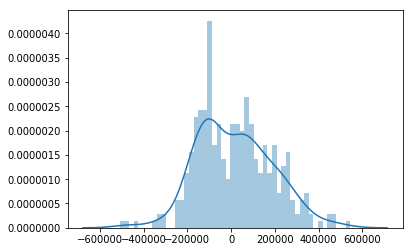

In [127]:
# Distribution plot for error for predictions
sns.distplot((y_test-predictions),bins=50);

In [128]:
# Evaluation metrics for model
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 139897.95293798763)
('MSE:', 29433681431.999977)
('RMSE:', 171562.47093114501)


In [124]:
# Model slope and intercept
print("Model slope:    ", lm.coef_[0])
print("Model intercept:", lm.intercept_)

('Model slope:    ', array([ 3091.44808494]))
('Model intercept:', array([ 335990.77573056]))


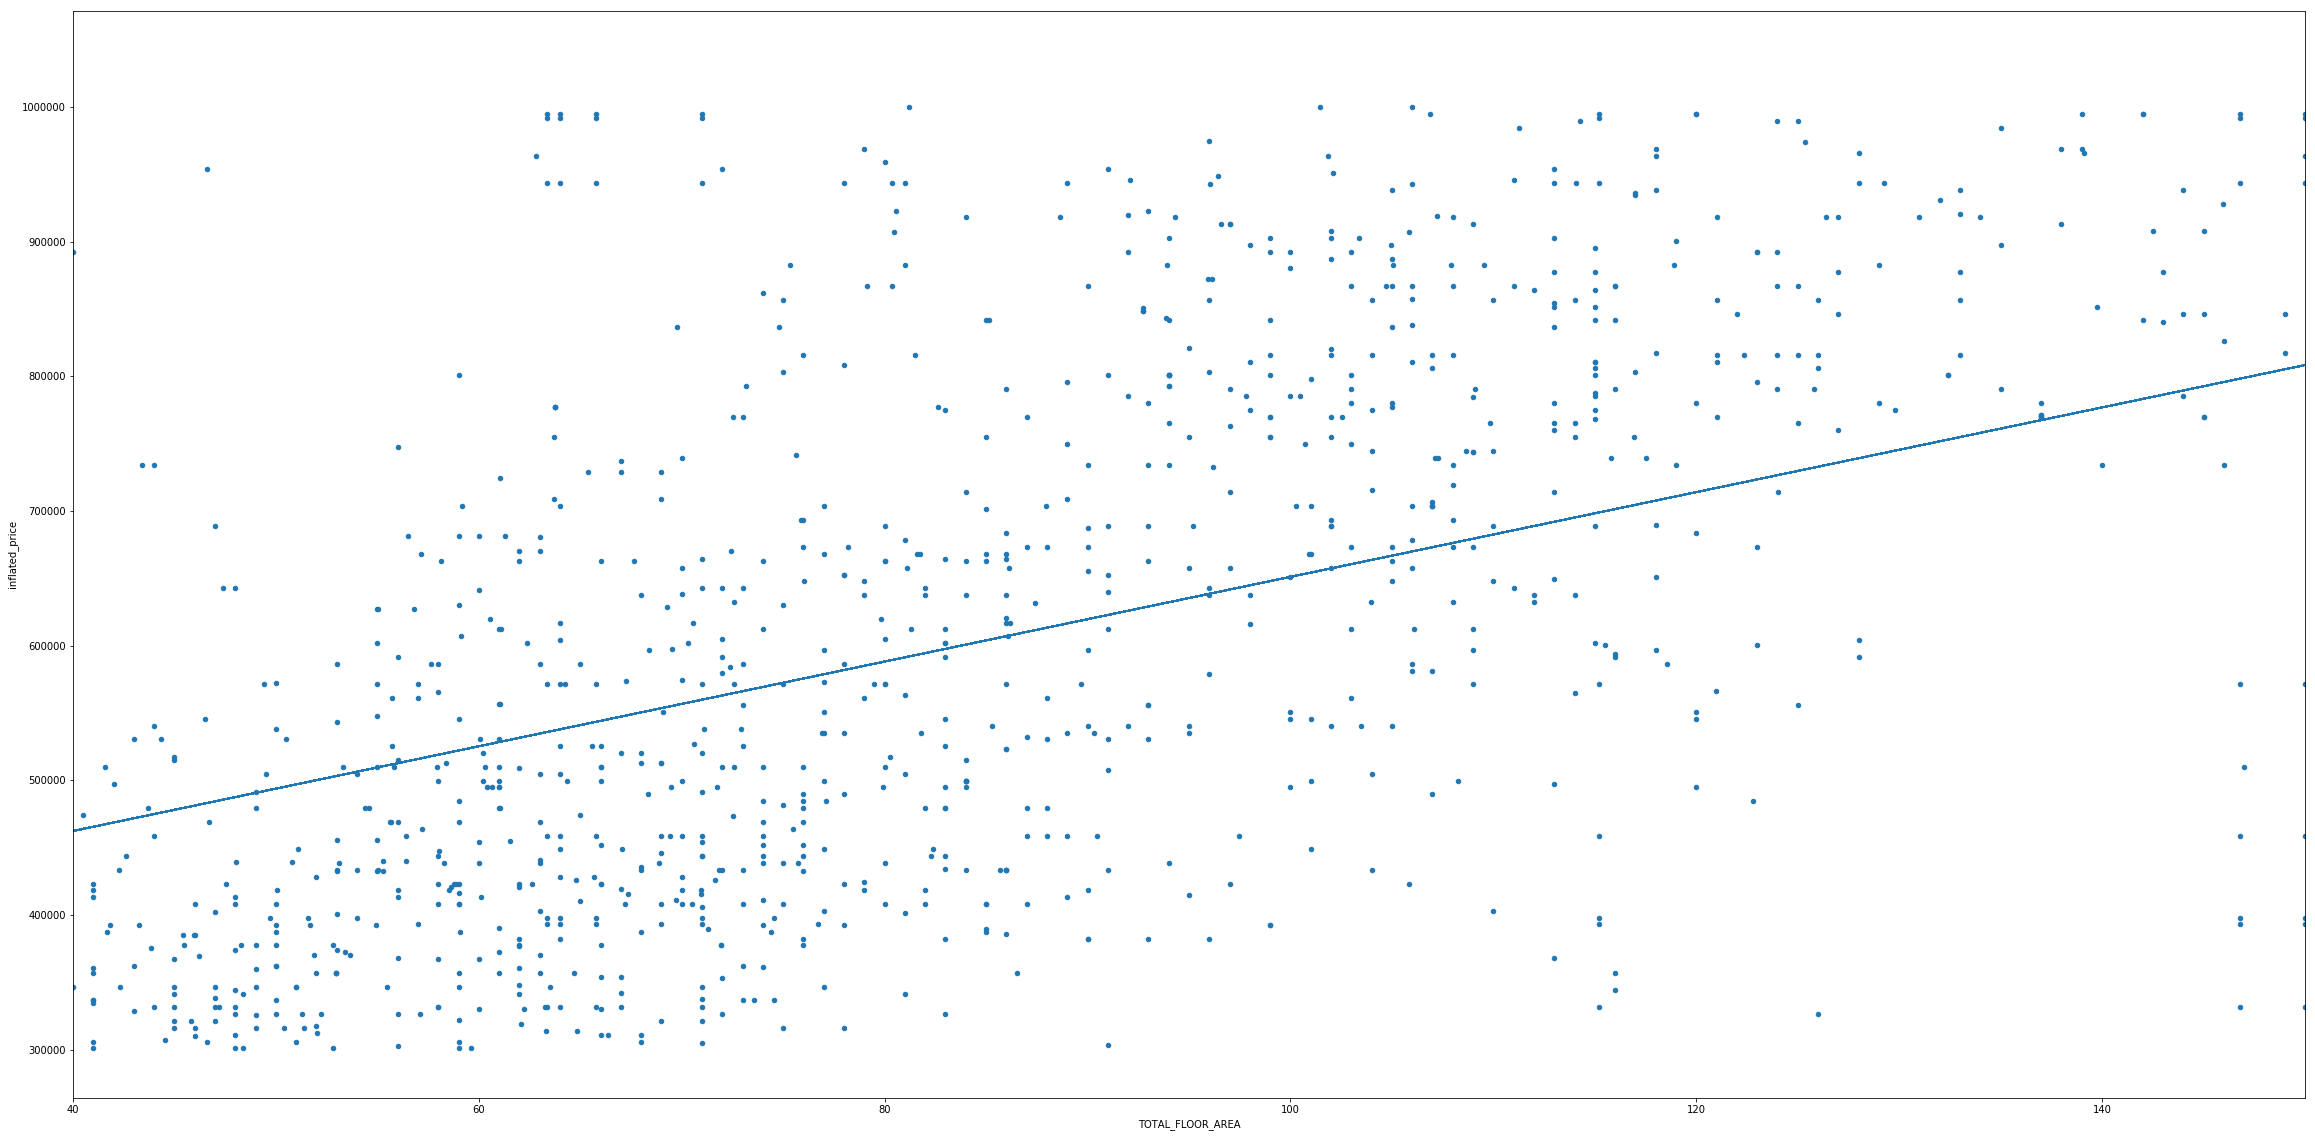

In [119]:
# Large scatter plot with regression line plotted for one year, one district, one variable total floor area using price adjusted for inflation
yfit = lm.predict(X)
var = 'TOTAL_FLOOR_AREA'
data = pd.concat([twentysixteennonull['inflated_price'], twentysixteennonull[var]], axis=1)
data.plot.scatter(x=var, y='inflated_price', xlim=(40,150),figsize=(40,20))
plt.plot(X,yfit)


In [130]:
# Split into training and test data for all years

y = southwarknonull["inflated_price"].reshape((17944,1))
X = southwarknonull['TOTAL_FLOOR_AREA'].reshape((17944,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [131]:
print X.shape
print y.shape

(17944, 1)
(17944, 1)


In [132]:
# Create linear regression model and apply to training data
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

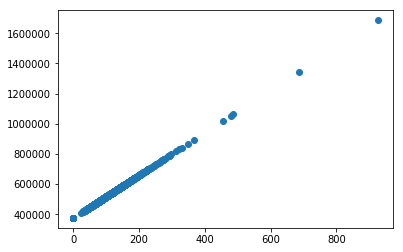

In [133]:
# Plot model prediction on test data
predictions = lm.predict(X_test)
plt.scatter(X_test,predictions)

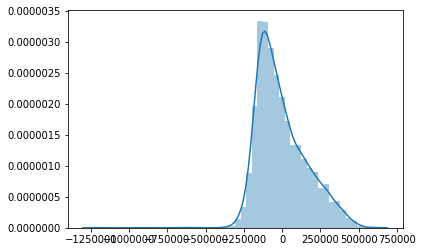

In [134]:
# Distribution plot for error for predictions
sns.distplot((y_test-predictions),bins=50);

In [135]:
# Evaluation metrics for model
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 129854.39317099037)
('MSE:', 25851690407.838284)
('RMSE:', 160784.60874050812)


In [124]:
# Model slope and intercept
print("Model slope:    ", lm.coef_[0])
print("Model intercept:", lm.intercept_)

('Model slope:    ', array([ 3091.44808494]))
('Model intercept:', array([ 335990.77573056]))


### Holding all other features fixed, a 1 unit increase in Total Floor Area is associated with an increase of £3091.45



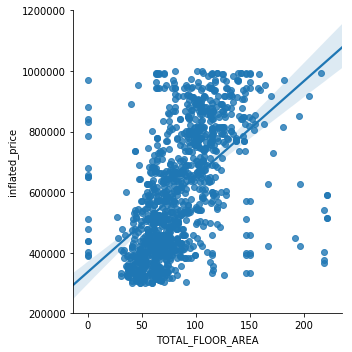

In [136]:
# Plot regression model with variance
sns.lmplot(x='TOTAL_FLOOR_AREA',y='inflated_price',data=southwarknonull)

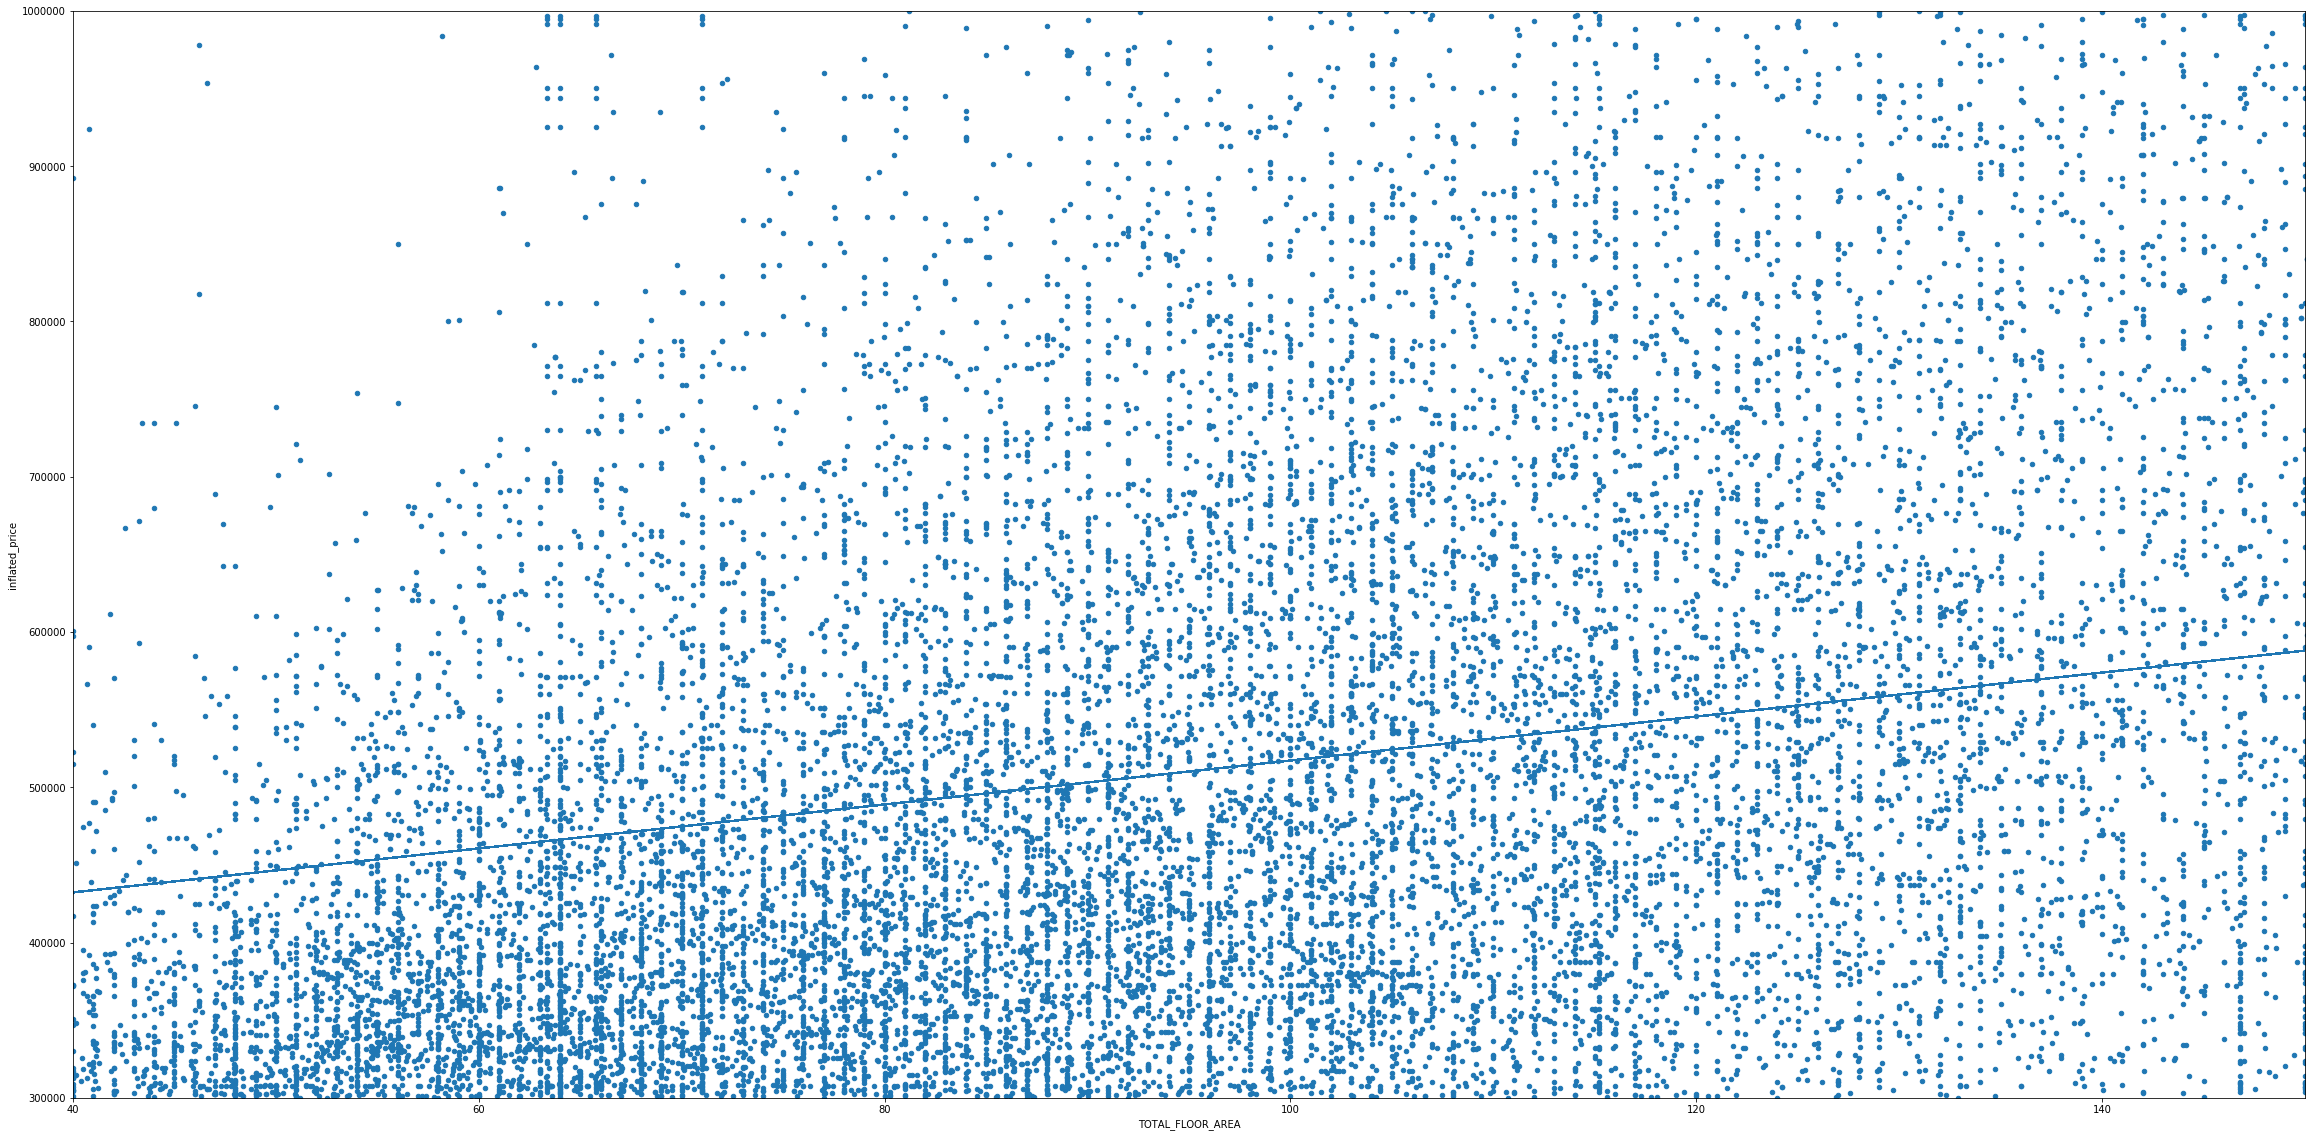

In [141]:
# Large scatter plot with regression line plotted for every year, one district, one variable total floor area using price adjusted for inflation

yfit = lm.predict(X)
var = 'TOTAL_FLOOR_AREA'
data = pd.concat([southwarknonull['inflated_price'], southwarknonull[var]], axis=1)
data.plot.scatter(x=var, y='inflated_price', ylim = (300000,1000000),xlim=(40,150),figsize=(40,20))
plt.plot(X,yfit)


## One hot encoding

In [148]:
# One hot encoding for categorical variable District
onehot = price_trim[["inflated_price","TOTAL_FLOOR_AREA","District"]].dropna(axis=0,how='any').copy()

In [149]:
onehot.head()

,inflated_price,TOTAL_FLOOR_AREA,District
25,494100,270,SOUTHWARK
26,494100,188,BARNET
30,366915,249,LEWISHAM
62,777750,234,HARINGEY
65,426024,115,ISLINGTON


In [150]:
onehot.shape

(350333, 3)

In [172]:
onehot2 = pd.get_dummies(data=onehot,columns=['District'])

In [173]:
onehot2.head()

,inflated_price,TOTAL_FLOOR_AREA,DISTRICT,District_BARKING AND DAGENHAM,District_BARNET,District_BEXLEY,District_BRENT,District_BROMLEY,District_CAMDEN,District_CITY OF LONDON,District_CITY OF WESTMINSTER,District_CROYDON,District_EALING,District_ENFIELD,District_EPPING FOREST,District_GREENWICH,District_HACKNEY,District_HAMMERSMITH AND FULHAM,District_HARINGEY,District_HARROW,District_HAVERING,District_HILLINGDON,District_HOUNSLOW,District_ISLINGTON,District_KENSINGTON AND CHELSEA,District_KINGSTON UPON THAMES,District_LAMBETH,District_LEWISHAM,District_MERTON,District_NEWHAM,District_REDBRIDGE,District_RICHMOND UPON THAMES,District_SOUTHWARK,District_SUTTON,District_TOWER HAMLETS,District_WALTHAM FOREST,District_WANDSWORTH
25,494100,270,SOUTHWARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26,494100,188,BARNET,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,366915,249,LEWISHAM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
62,777750,234,HARINGEY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65,426024,115,ISLINGTON,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [189]:
y = onehot2[['TOTAL_FLOOR_AREA',
       'District_BARKING AND DAGENHAM', 'District_BARNET',
       'District_BEXLEY', 'District_BRENT', 'District_BROMLEY',
       'District_CAMDEN', 'District_CITY OF LONDON',
       'District_CITY OF WESTMINSTER', 'District_CROYDON',
       'District_EALING', 'District_ENFIELD', 'District_EPPING FOREST',
       'District_GREENWICH', 'District_HACKNEY',
       'District_HAMMERSMITH AND FULHAM', 'District_HARINGEY',
       'District_HARROW', 'District_HAVERING', 'District_HILLINGDON',
       'District_HOUNSLOW', 'District_ISLINGTON',
       'District_KENSINGTON AND CHELSEA', 'District_KINGSTON UPON THAMES',
       'District_LAMBETH', 'District_LEWISHAM', 'District_MERTON',
       'District_NEWHAM', 'District_REDBRIDGE',
       'District_RICHMOND UPON THAMES', 'District_SOUTHWARK',
       'District_SUTTON', 'District_TOWER HAMLETS',
       'District_WALTHAM FOREST', 'District_WANDSWORTH']]
X = onehot2['TOTAL_FLOOR_AREA'].reshape((350333,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [190]:
print X.shape
print y.shape

(350333, 1)
(350333, 35)


In [191]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [194]:
print("Model slope:    ", lm.coef_[0])
print("Model intercept:", lm.intercept_)

('Model slope:    ', array([ 1.]))
('Model intercept:', array([  9.66338121e-13,   2.42610200e-05,   5.90669989e-02,
         1.35631976e-03,   2.72414377e-02,   6.45777889e-03,
         2.63075292e-02,   3.89671063e-04,   3.08896111e-02,
         1.17932552e-02,   5.80073206e-02,   3.00350005e-02,
         1.55797462e-04,   4.63857827e-02,   2.73151947e-02,
         5.26981137e-02,   4.52540987e-02,  -3.30443958e-06,
         3.23770592e-06,   5.38087347e-05,   1.41604837e-02,
         3.01568394e-02,   2.13756089e-02,   5.20190872e-04,
         6.47694025e-02,   5.12996127e-02,   4.92961348e-02,
         3.60573285e-02,   1.18310982e-02,   1.89941667e-02,
         5.17568989e-02,   6.62751622e-06,   3.89304740e-02,
         6.06421059e-02,   1.26771114e-01]))


In [168]:
onehot2.head()

,inflated_price,TOTAL_FLOOR_AREA,District_BARKING AND DAGENHAM,District_BARNET,District_BEXLEY,District_BRENT,District_BROMLEY,District_CAMDEN,District_CITY OF LONDON,District_CITY OF WESTMINSTER,District_CROYDON,District_EALING,District_ENFIELD,District_EPPING FOREST,District_GREENWICH,District_HACKNEY,District_HAMMERSMITH AND FULHAM,District_HARINGEY,District_HARROW,District_HAVERING,District_HILLINGDON,District_HOUNSLOW,District_ISLINGTON,District_KENSINGTON AND CHELSEA,District_KINGSTON UPON THAMES,District_LAMBETH,District_LEWISHAM,District_MERTON,District_NEWHAM,District_REDBRIDGE,District_RICHMOND UPON THAMES,District_SOUTHWARK,District_SUTTON,District_TOWER HAMLETS,District_WALTHAM FOREST,District_WANDSWORTH
25,494100,270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26,494100,188,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,366915,249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
62,777750,234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65,426024,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


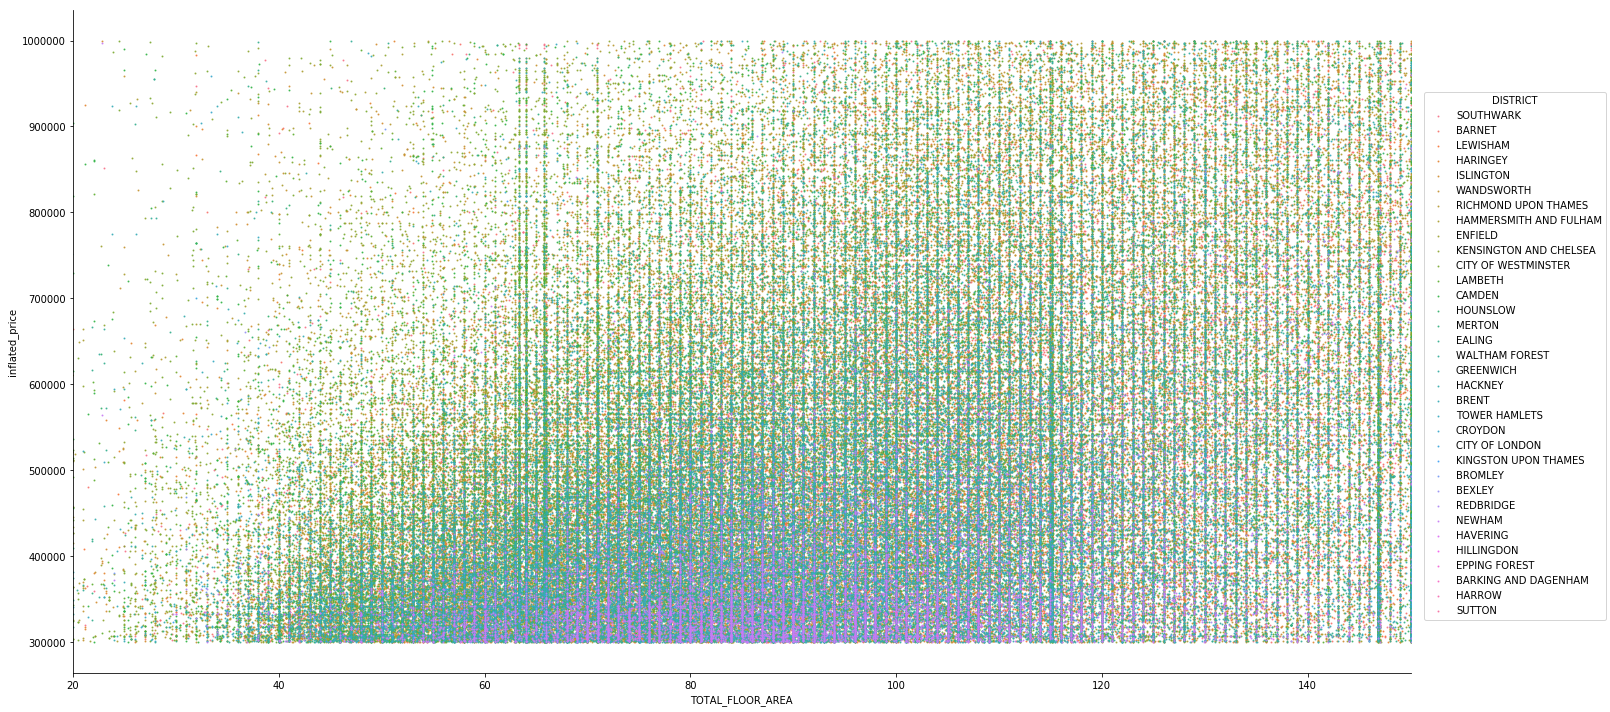

In [193]:
# Scatter plot coloured by district
sns.lmplot(x='TOTAL_FLOOR_AREA',y='inflated_price',data=onehot2,hue='DISTRICT',fit_reg=False,size=10,aspect=2,scatter_kws={"s": 1}).set(xlim=(20, 150))